In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\Loan.csv")

In [69]:
dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [70]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
dataset["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [74]:
dataset["Dependents"] = dataset["Dependents"].replace("3+", 3).astype(float)

In [76]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
dataset["Dependents"].fillna(dataset["Dependents"].mean(), inplace=True)
dataset["Self_Employed"].fillna(dataset["Self_Employed"].mode()[0], inplace=True)
dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(), inplace=True)
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean(), inplace=True)

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_5768\1684071199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_5768\1684071199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [77]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [78]:
#finding dataset type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [79]:
#One hot Encoding
from sklearn.preprocessing import LabelEncoder
le_gen = LabelEncoder()
le_edu = LabelEncoder()
le_emp = LabelEncoder()
dataset["Gender_enc"] = le_gen.fit_transform(dataset["Gender"])
dataset["Education_enc"] = le_edu.fit_transform(dataset["Education"])
dataset["Self_Employed_enc"] = le_emp.fit_transform(dataset["Self_Employed"])

In [80]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_enc,Education_enc,Self_Employed_enc
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y,1,0,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N,1,0,0


In [ ]:
new_clean_and_encoded_dataset = dataset.drop(columns=["Loan_ID", "Gender", ])

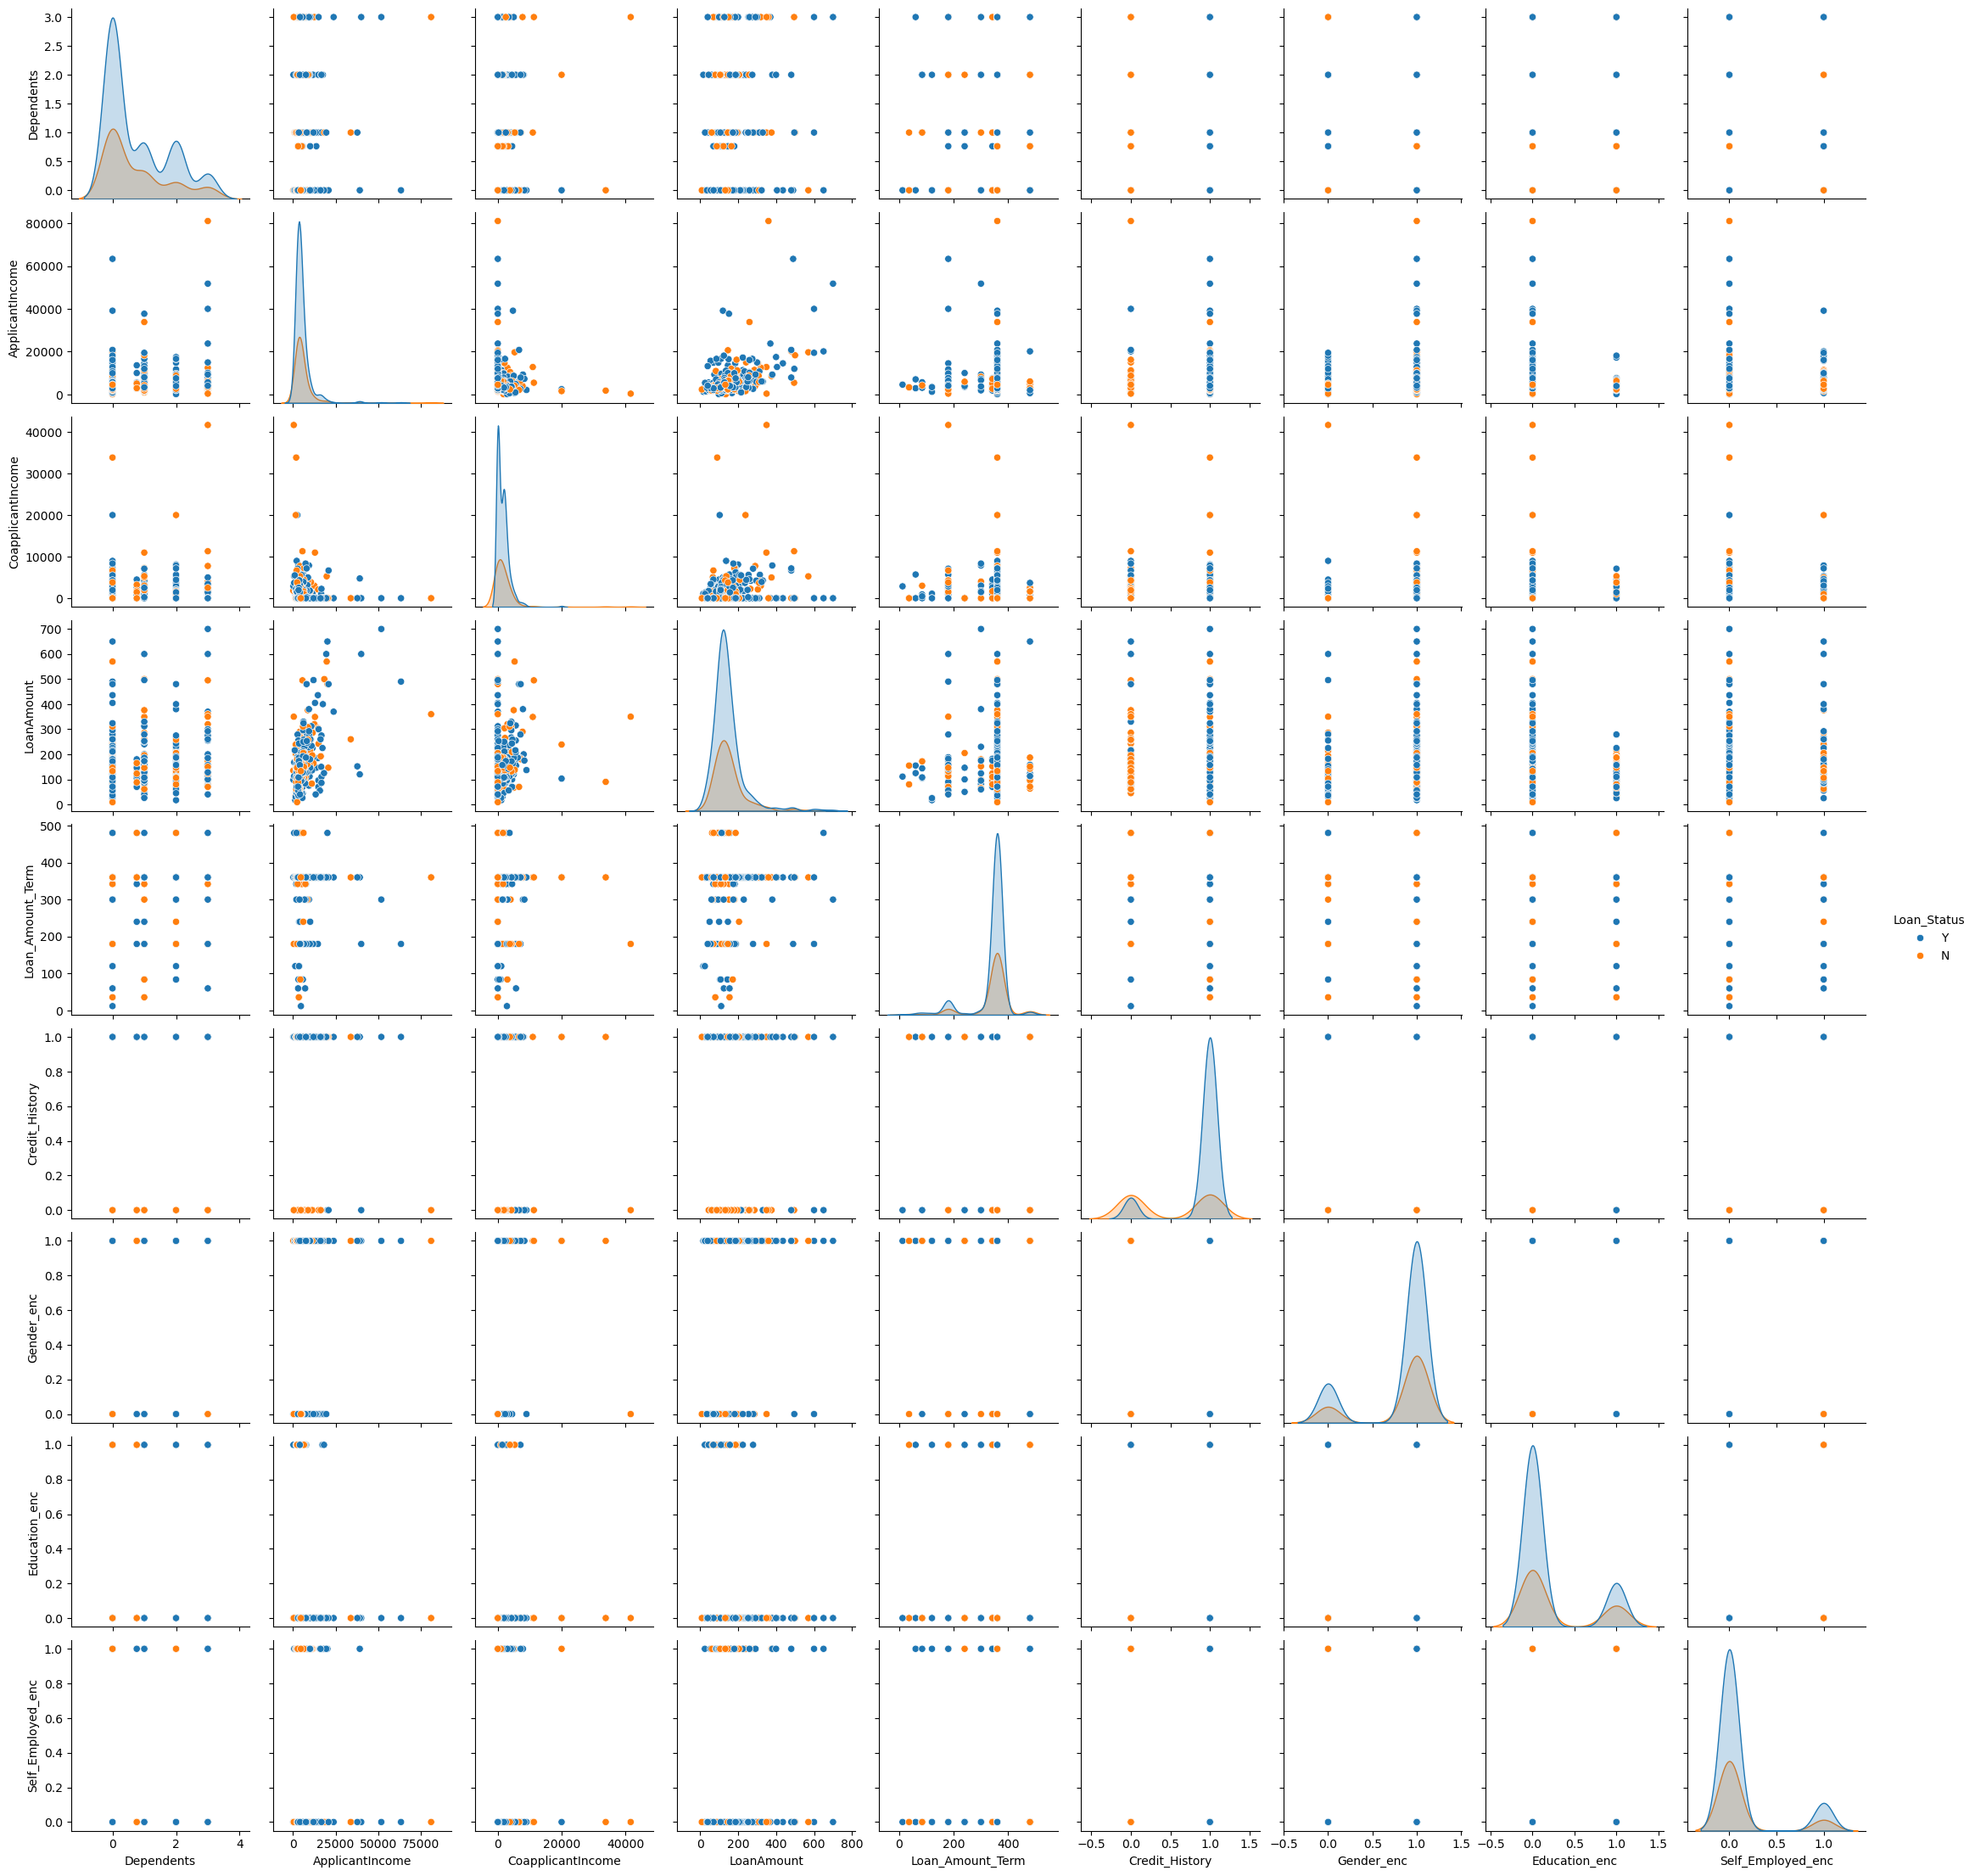

In [81]:
sns.pairplot(dataset, hue='Loan_Status')

In [31]:
#seperate data before split
X = dataset.drop(columns=["Loan_ID" ,"Loan_Status"])
y = dataset["Loan_Status"]

In [32]:
#now split in train test 
from sklearn.model_selection import train_test_split

In [34]:
# help(train_test_split)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'